In [ ]:
pip install Scrapy

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.6.0'

In [3]:
keras.__version__

'2.6.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

### Building an Image Classifier Using the Sequential API
- Create a Sequential model, the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially - the sequential API

In [10]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()

'''
Build the first layer and add it to the model
a Flatten layer whose role is simply to convert each input image into a 1D array
Need to specify the input_shape, not the batch size, only the shape of the instances
'''
model.add(keras.layers.Flatten(input_shape=[28,28]))

'''
Add a Dense hidden layer with 300 neurons, using the ReLU activation function
Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and inputs
also manages a vector of bias terms (one per neuron)
'''
model.add(keras.layers.Dense(300, activation="relu"))

'''
Add a second Dense hidden layer with 100 neurons, also using the ReLU activation function
'''
model.add(keras.layers.Dense(100, activation="relu"))

'''
Add a Dense output layer with 10 neurons (one per class),
using thesoftmax activation function (because the classes are exclusive)
'''
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
# Instead of adding the layers one by one as we just did, can pass a list of layerswhen creating the Sequential model
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- the 1st hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters

In [13]:
# get a model’s list of layers
model.layers

In [14]:
# fetch a layer by index
model.layers[1].name

'dense_3'

In [15]:
# fetch a layer by name
model.get_layer('dense_5').name

'dense_5'

In [16]:
# specify the loss function and the optimizer after a model is created
model.compile(loss="sparse_categorical_crossentropy",  # sparse labels and the classes are exclusive
              optimizer="sgd",   # train the model using simple Stochastic Gradient Descent
              metrics=["accuracy"])   # measure its "accuracy" during training and evaluation for a classifier

In [17]:
# Training and Evaluating the Model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7208 - accuracy: 0.7619 - val_loss: 0.5203 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4880 - accuracy: 0.8299 - val_loss: 0.4420 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4451 - accuracy: 0.8440 - val_loss: 0.4071 - val_accuracy: 0.8618
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4175 - accuracy: 0.8534 - val_loss: 0.3937 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3983 - accuracy: 0.8615 - val_loss: 0.3828 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8655 - val_loss: 0.3778 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3700 - accuracy: 0.8689 - val_loss: 0.3665 - val_accuracy:

In [18]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [19]:
history.history

{'loss': [0.7208027243614197,
  0.4879724681377411,
  0.44507306814193726,
  0.4174853563308716,
  0.39830321073532104,
  0.38248321413993835,
  0.36996814608573914,
  0.35808441042900085,
  0.3476102650165558,
  0.33798110485076904,
  0.33054620027542114,
  0.3217843472957611,
  0.3140575587749481,
  0.30660536885261536,
  0.3013598620891571,
  0.2937939465045929,
  0.28801536560058594,
  0.282719224691391,
  0.27716055512428284,
  0.2713947594165802,
  0.2666458189487457,
  0.26262661814689636,
  0.25780051946640015,
  0.2541140019893646,
  0.24885860085487366,
  0.24458958208560944,
  0.2414325773715973,
  0.23712719976902008,
  0.23234809935092926,
  0.22973768413066864],
 'accuracy': [0.7618908882141113,
  0.829872727394104,
  0.843999981880188,
  0.8533636331558228,
  0.8614545464515686,
  0.8654727339744568,
  0.8688908815383911,
  0.8747272491455078,
  0.8771091103553772,
  0.880472719669342,
  0.8822000026702881,
  0.8849272727966309,
  0.8880363702774048,
  0.8900363445281982

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

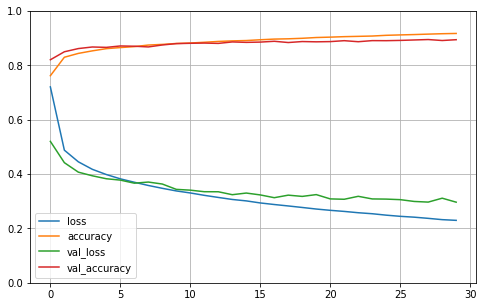

In [20]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)   # set the vertical range to [0-1]
plt.show()

- the validation curves are quite close to the training curves, which means that there is not too much overfitting
- the model performed better on the validation set than on the training set at the beginning of training (when the validation set is fairly small)
- the training set performance ends up beating the validation performance, as is generally the case when train for long enough
- the model has not quite converged yet, as the validation loss is still going down, should probably continue training
- just calling the fit() method again, since Keras just continues training where it left off (should be able to reach close to 89% validation accuracy)
- if not satisfied with the performance of model, should go back and tune the model’s hyperparameters
 - the number of layers
 - the number of neurons per layer
 - the types of activation functions used for each hidden layer
 - the number of training epochs
 - the batch size

In [21]:
'''
Once satisfied with model’s validation accuracy,
should evaluate it on the test set to estimate the generalization error
before deploying the model to production
'''
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.7161 - accuracy: 0.8554


[59.716068267822266, 0.855400025844574]

- It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set.

#### Using the Model to Make Predictions

In [22]:
X_new = X_test[:3]

In [26]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
# only care about the class with the highest estimated probability (even if that probability is quite low)
'''model.predict_classes() has been removed in TensorFlow version 2.6'''
y_pred = model.predict(X_new) 
y_classes = np.argmax(y_pred, axis=1)
y_classes

<IPython.core.display.Javascript object>

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_classes]

<IPython.core.display.Javascript object>

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API
- output layer has a single neuron (since only to predict a single value) and uses no activation function, and the loss function is the mean squared error.

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [42]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 983us/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 786us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 859us/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 787us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 797us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 793us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 786us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 790us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 834us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 804us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==================

### Building Complex Models Using the Functional API
- One example of a non-sequential neural network is a Wide & Deep neural network.
- It connects all or part of the inputs directly to the output layer.
- This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).
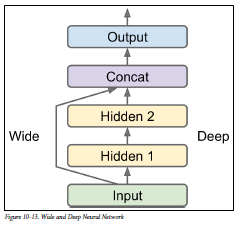

In [37]:
# create an Input object as may have multiple inputs
input = keras.layers.Input(shape=X_train.shape[1:])

'''
create a Dense layer with 30 neurons and using the ReLU activation function
like a function, passing it the input
telling Keras how it should connect the layers together, no actual data is being processed yet
'''
hidden1 = keras.layers.Dense(30, activation="relu")(input)

hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

#create a Concatenate() layer, concatenating the input and the output of the second hidden layer
contact = keras.layers.concatenate([input, hidden2])

# create the output layer, with a single neuron and no activation function, passing it the result of the concatenation
output = keras.layers.Dense(1)(contact)

# create a Keras Model, specifying which inputs and outputs to use
model = keras.models.Model(inputs=[input], outputs=[output])

- Once have built the Keras model, everything is exactly like earlier

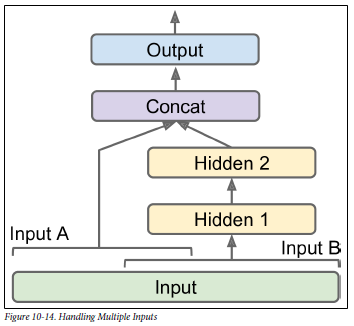
- send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path
- one solution is to use multiple inputs

In [39]:
# send 5 features through the deep path (features 0 to 4), and 6 features through the wide path (features 2 to 7)
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [40]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 959us/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 961us/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 951us/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 977us/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 959us/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 957us/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 973us/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 999us/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [======================

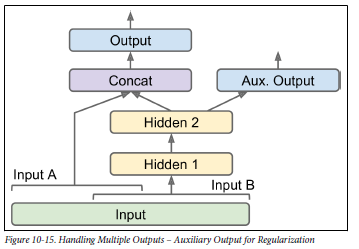
- add some auxiliary outputs in a neural network architectureto ensure that
- the underlying part of the network learns something useful on its own, without relying on the rest of the network

In [44]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [45]:
'''
each output will need its own loss function
compile the model by passing a list of losses
passing a single loss will make Keras assume that the same loss must be used for all outputs
By default, Keras will compute all these losses and simply add them up to get the final loss used for training
care much more about the main output than about the auxiliary output (as it is just used for regularization)
need to give the main output’s loss a much greater weight
'''
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

# when evaluating the model, Keras will return the total loss, as well as all the individuallosses
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - dense_26_loss: nan - dense_27_loss: nan - val_loss: nan - val_dense_26_loss: nan - val_dense_27_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - dense_26_loss: nan - dense_27_loss: nan - val_loss: nan - val_dense_26_loss: nan - val_dense_27_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - dense_26_loss: nan - dense_27_loss: nan - val_loss: nan - val_dense_26_loss: nan - val_dense_27_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - dense_26_loss: nan - dense_27_loss: nan - val_loss: nan - val_dense_26_loss: nan - val_dense_27_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - dense_26_loss: nan - dense_27_loss: nan - val_loss: nan - val_dense_26_loss: nan - val_dense_27_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - lo

### Building Dynamic Models Using the Subclassing API

In [46]:
'''
creating an instance of the following WideAndDeepModel class 
gives an equivalent model to the one just built with the Functional API
'''
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)    # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [ ]:
'''
Save a trained Keras model (for only Sequential API or the Functional API), using the HDF5 format
the model’s architecture (including every layer’s hyperparameters) 
the value of all the model parameters for every layer (e.g., connection weights and biases)
the optimizer (including its hyperparameters and any state it may have)
'''
model.save("my_keras_model.h5")

# Load the model
model = keras.models.load_model("my_keras_model.h5")